In [3]:
import keras

import matplotlib.gridspec as gridspec
from tqdm.notebook import trange, tqdm

from models.VLAE import VLAE
from models.VAE import VAE


vae_gan_mnist = keras.models.load_model("/Users/leo/Downloads/vae_gan_mnist.h5")
vae_gan_mnist_decoder = vae_gan_mnist.layers[-1]

vlae_gan_mnist = keras.models.load_model("/Users/leo/Downloads/vlae_gan_mnist.h5")
vlae_gan_mnist_decoder = vlae_gan_mnist.layers[-1]

/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
vlae = VLAE(input_dim=(28,28,1),
            inf0_kernels_strides_featuremaps=[(5, 2, 64)],
            inf1_kernels_strides_featuremaps=[(3, 2, 64)],
            ladder0_kernels_strides_featuremaps=[(5, 2, 64)],
            ladder1_kernels_strides_featuremaps=[(5, 2, 64)],
            ladder2_kernels_strides_featuremaps=[(3, 1, 64), (3, 1, 64)],
            gen2_num_units=[1024, 1024],
            gen1_num_units=[1024, 1024],
            gen0_kernels_strides_featuremaps=[(5, 2, 64), (3, 2, 64), (5, 1, 1)],
            use_dropout=False, use_batch_norm=False, log_dir="logs",kernel_visualization_layer=1, num_samples=1,
            feature_map_layers=[], inner_activation="ReLU", decay_rate=.0, feature_map_reduction_factor=1, z_dims=[2,2,2])
vlae.load_weights("/Users/leo/Downloads/vlae_28_mnist.h5")

vae = VAE(input_dim=(28,28,1), encoder_conv_filters=[32, 64, 64, 64],
          encoder_conv_kernel_size=[3, 3, 3, 3],
          encoder_conv_strides=[2, 2, 1, 1],
          decoder_conv_t_filters=[64, 64, 32, 1],
          decoder_conv_t_kernel_size=[3, 3, 3, 3],
          decoder_conv_t_strides=[1, 1, 2, 2],
          log_dir='logs',
          z_dims=[2],
          kernel_visualization_layer=1,
          feature_map_layers=[], use_batch_norm=False,
          use_dropout=False,
          decay_rate=.0, num_samples=5,
          feature_map_reduction_factor=1,
          inner_activation="ReLU", dropout_rate=.0)
vae.load_weights("/Users/leo/Documents/Tesla2/vae/master-thesis-leonard/logs_vae_28_mnist_20-06-2020/weights/weights.h5")

In [5]:
import numpy as np
columns = 20
from matplotlib import pyplot as plt
rows = 20
zs = []

for i in range(-30, 30,3):
    for j in range(-30, 30,3):
        z1 = np.zeros((1,2))
        z1[0] = np.array([i/10, j/10])
        zs.append(z1)


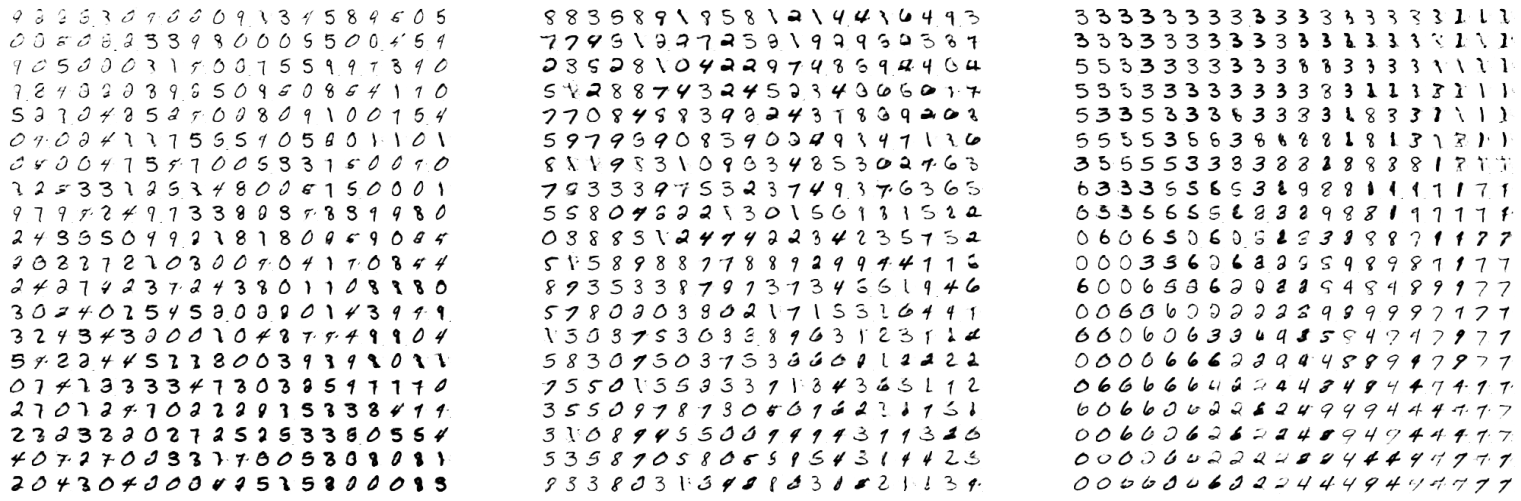

In [6]:
fig = plt.figure(figsize=(27, 9))
outer = fig.add_gridspec(1, 3, wspace=0.2, hspace=0.2)


for col in trange(3):
    inner = outer[col].subgridspec(20, 20, wspace=0.1, hspace=0.1)
    for i in range(400):
        ax = fig.add_subplot(inner[i])
        z = [np.random.uniform(-3,3,(1,2))] * 3
        z[col] = zs[i]
        img = vlae_gan_mnist_decoder.predict(z).squeeze()
        ax.imshow(1.0 - img, cmap='gray')
        ax.axis('off')
        fig.add_subplot(ax)
plt.show()


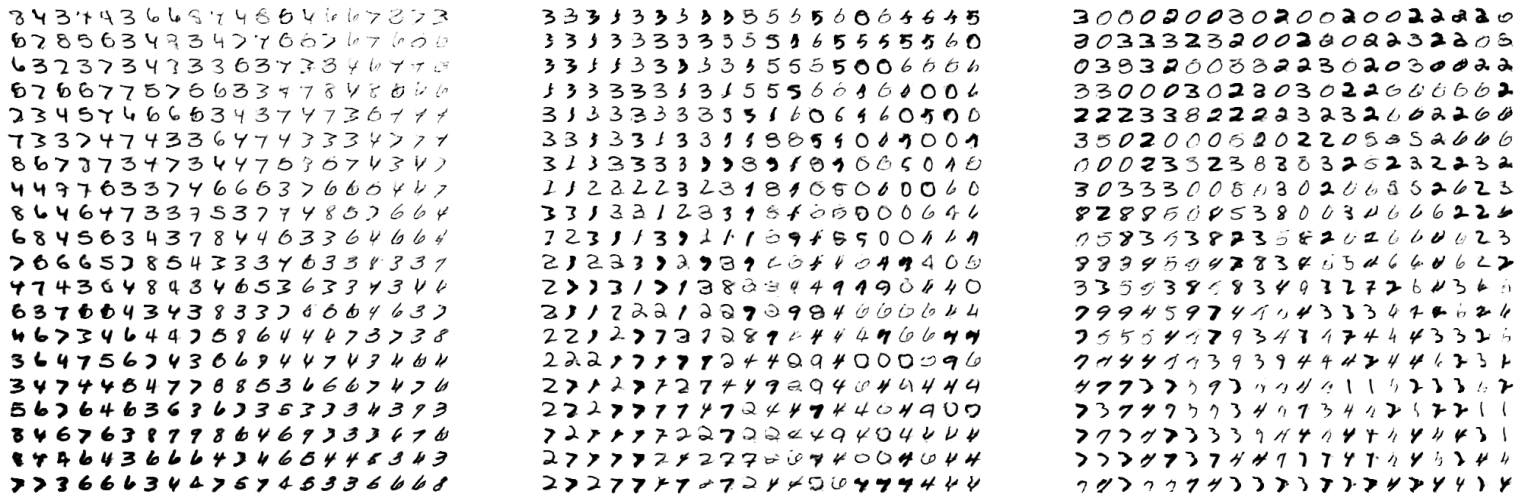

In [7]:
fig = plt.figure(figsize=(27, 9))
outer = fig.add_gridspec(1, 3, wspace=0.2, hspace=0.2)


for col in trange(3):
    inner = outer[col].subgridspec(20, 20, wspace=0.1, hspace=0.1)
    for i in range(400):
        ax = fig.add_subplot(inner[i])
        z = [np.random.uniform(-3,3,(1,2))] * 3
        z[col] = zs[i]
        img = vlae.decoder.predict(z).squeeze()
        ax.imshow(1.0 - img, cmap='gray')
        ax.axis('off')
        fig.add_subplot(ax)
plt.show()

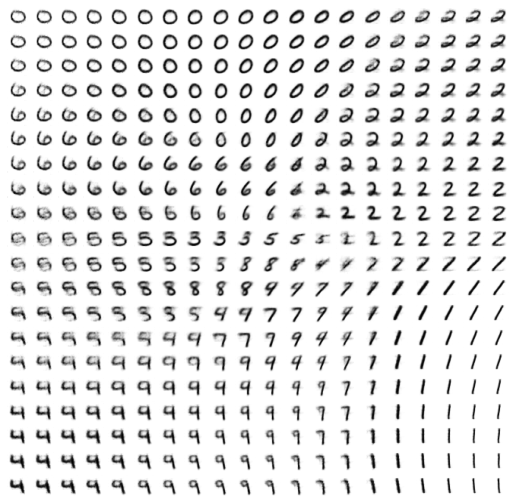

In [8]:
fig = plt.figure(figsize=(9, 9))

for i in trange(400):
    z = zs[i]
    img = vae.decoder.predict(z).squeeze()
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(1.0 - img, cmap='gray')
    plt.axis('off')
plt.show()

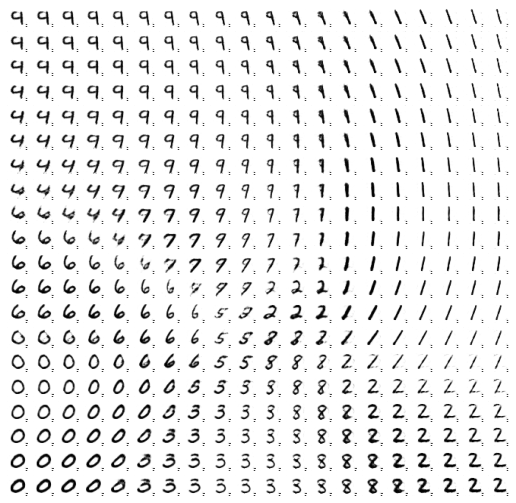

In [9]:
fig = plt.figure(figsize=(9, 9))

for i in trange(400):
    z = zs[i]
    img = vae_gan_mnist_decoder.predict(z).squeeze()
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(1.0 - img, cmap='gray')
    plt.axis('off')
plt.show()

In [11]:
from keras.datasets import mnist
import numpy as np
from sklearn.utils import shuffle
import scipy as sp
from utils.img_ops import resize_array
(_,_),(mnists,_) = mnist.load_data()
mnists = shuffle(mnists)
mnists = mnists.reshape((mnists.shape[0], -1))
mnist_mean = np.mean(mnists, axis=1)
mnist_sd = np.std(mnists, axis=1)
mnist_skew = sp.stats.skew(mnists, axis=1)
mnist_kurt = sp.stats.kurtosis(mnists, axis=1)

vlae_gens = vlae.decoder.predict([np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000) for _ in range(3)]).squeeze()
vlae_gens = np.stack(vlae_gens)
vlae_gens *= 255.0
vlae_gens = vlae_gens.reshape(vlae_gens.shape[0], -1)
vlae_gens_mean = np.mean(vlae_gens, axis=1)
vlae_gens_sd = np.std(vlae_gens, axis=1)
vlae_gens_skew = sp.stats.skew(vlae_gens, axis=1)
vlae_gens_kurt = sp.stats.kurtosis(vlae_gens, axis=1)

vlaegan_gens = vlae_gan_mnist_decoder.predict([np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000) for _ in range(3)]).squeeze()
vlaegan_gens = np.stack(vlaegan_gens)
vlaegan_gens *= 255.0
vlaegan_gens = vlaegan_gens.reshape(vlaegan_gens.shape[0], -1)
vlaegan_gens_mean = np.mean(vlaegan_gens, axis=1)
vlaegan_gens_sd = np.std(vlaegan_gens, axis=1)
vlaegan_gens_skew = sp.stats.skew(vlaegan_gens, axis=1)
vlaegan_gens_kurt = sp.stats.kurtosis(vlaegan_gens, axis=1)

vaegan_gens = vae_gan_mnist_decoder.predict(np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000).squeeze())
vaegan_gens = np.stack(vaegan_gens)
vaegan_gens *= 255.0
vaegan_gens = vaegan_gens.reshape(vaegan_gens.shape[0], -1)
vaegan_gens_mean = np.mean(vaegan_gens, axis=1)
vaegan_gens_sd = np.std(vaegan_gens, axis=1)
vaegan_gens_skew = sp.stats.skew(vaegan_gens, axis=1)
vaegan_gens_kurt = sp.stats.kurtosis(vaegan_gens, axis=1)

vae_gens = vae.decoder.predict(np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000))
vae_gens = np.stack(vae_gens)
vae_gens *= 255.0
vae_gens = resize_array(vae_gens, (28,28), False)
vae_gens = vae_gens.reshape(vae_gens.shape[0], -1)
vae_gens_mean = np.mean(vae_gens, axis=1)
vae_gens_sd = np.std(vae_gens, axis=1)
vae_gens_skew = sp.stats.skew(vae_gens, axis=1)
vae_gens_kurt = sp.stats.kurtosis(vae_gens, axis=1)

In [12]:
import scipy as sp

print("vae mean",sp.stats.wilcoxon(mnist_mean, vae_gens_mean))
print("vae sd",sp.stats.wilcoxon(mnist_sd, vae_gens_sd))
print("vae skew",sp.stats.wilcoxon(mnist_skew, vae_gens_skew))
print("vae kurt",sp.stats.wilcoxon(mnist_kurt, vae_gens_kurt))
print('---')
print("vlae mean",sp.stats.wilcoxon(mnist_mean, vlae_gens_mean))
print("vlae sd",sp.stats.wilcoxon(mnist_sd, vlae_gens_sd))
print("vlae skew",sp.stats.wilcoxon(mnist_skew, vlae_gens_skew))
print("vlae kurt",sp.stats.wilcoxon(mnist_kurt, vlae_gens_kurt))
print('---')
print("vlae gan mean",sp.stats.wilcoxon(mnist_mean, vlaegan_gens_mean))
print("vlae gan sd",sp.stats.wilcoxon(mnist_sd, vlaegan_gens_sd))
print("vlae gan skew",sp.stats.wilcoxon(mnist_skew, vlaegan_gens_skew))
print("vlae gan kurt",sp.stats.wilcoxon(mnist_kurt, vlaegan_gens_kurt))
print('---')
print("vae gan mean",sp.stats.wilcoxon(mnist_mean, vaegan_gens_mean))
print("vae gan sd",sp.stats.wilcoxon(mnist_sd, vaegan_gens_sd))
print("vae gan skew",sp.stats.wilcoxon(mnist_skew, vaegan_gens_skew))
print("vae gan kurt",sp.stats.wilcoxon(mnist_kurt, vaegan_gens_kurt))

vae mean WilcoxonResult(statistic=22937855.0, pvalue=8.576988160155084e-13)
vae sd WilcoxonResult(statistic=2282608.0, pvalue=0.0)
vae skew WilcoxonResult(statistic=13045802.0, pvalue=0.0)
vae kurt WilcoxonResult(statistic=17090175.0, pvalue=2.260618588568872e-165)
---
vlae mean WilcoxonResult(statistic=22624895.0, pvalue=1.7858883784072177e-16)
vlae sd WilcoxonResult(statistic=14952254.0, pvalue=1.5756809581408123e-265)
vlae skew WilcoxonResult(statistic=24429262.0, pvalue=0.04707711618138002)
vlae kurt WilcoxonResult(statistic=24770987.0, pvalue=0.42259668321673394)
---
vlae gan mean WilcoxonResult(statistic=22012096.0, pvalue=3.8377551184310955e-25)
vlae gan sd WilcoxonResult(statistic=21608788.0, pvalue=6.633923321672905e-32)
vlae gan skew WilcoxonResult(statistic=24409129.0, pvalue=0.03984585887414575)
vlae gan kurt WilcoxonResult(statistic=24568076.0, pvalue=0.13238167031612538)
---
vae gan mean WilcoxonResult(statistic=12575222.5, pvalue=0.0)
vae gan sd WilcoxonResult(statistic=

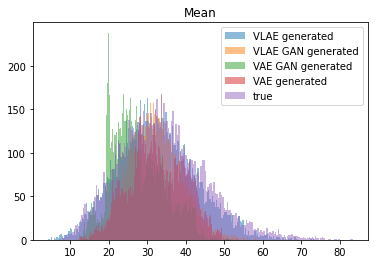

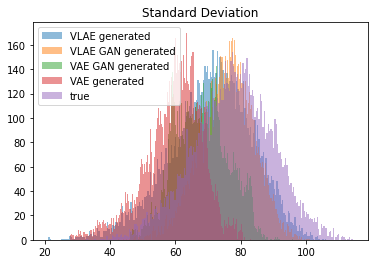

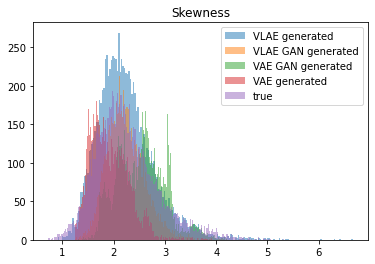

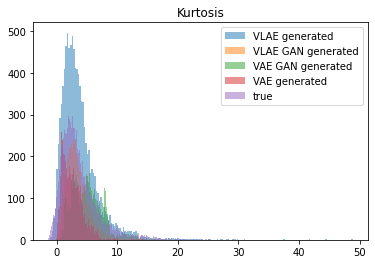

In [16]:
from matplotlib import pyplot as plt

bins = 200
plt.title("Mean")
plt.hist(vlae_gens_mean, bins, alpha=0.5, label="VLAE generated")
plt.hist(vlaegan_gens_mean, bins, alpha=0.5, label="VLAE GAN generated")
plt.hist(vaegan_gens_mean, bins, alpha=0.5, label="VAE GAN generated")
plt.hist(vae_gens_mean, bins, alpha=0.5, label="VAE generated")
plt.hist(mnist_mean, bins, alpha=0.5, label="true")
plt.legend()
plt.show()
plt.close()
plt.title("Standard Deviation")
plt.hist(vlae_gens_sd, bins, alpha=0.5, label="VLAE generated")
plt.hist(vlaegan_gens_sd, bins, alpha=0.5, label="VLAE GAN generated")
plt.hist(vaegan_gens_sd, bins, alpha=0.5, label="VAE GAN generated")
plt.hist(vae_gens_sd, bins, alpha=0.5, label="VAE generated")
plt.hist(mnist_sd, bins, alpha=0.5, label="true")
plt.legend()
plt.show()
plt.close()
plt.title("Skewness")
plt.hist(vlae_gens_skew, bins, alpha=0.5, label="VLAE generated")
plt.hist(vlaegan_gens_skew, bins, alpha=0.5, label="VLAE GAN generated")
plt.hist(vaegan_gens_skew, bins, alpha=0.5, label="VAE GAN generated")
plt.hist(vae_gens_skew, bins, alpha=0.5, label="VAE generated")
plt.hist(mnist_skew, bins, alpha=0.5, label="true")
plt.legend()
plt.show()
plt.close()
plt.title("Kurtosis")
plt.hist(vlae_gens_kurt, bins, alpha=0.5, label="VLAE generated")
plt.hist(vlaegan_gens_kurt, bins, alpha=0.5, label="VLAE GAN generated")
plt.hist(vaegan_gens_kurt, bins, alpha=0.5, label="VAE GAN generated")
plt.hist(vae_gens_kurt, bins, alpha=0.5, label="VAE generated")
plt.hist(mnist_kurt, bins, alpha=0.5, label="true")
plt.legend()
plt.show()
plt.close()

In [20]:
from keras import Input, Model
from keras.layers import Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense
from keras.datasets import mnist
import numpy as np

for name, decoder in [('vae', vae.decoder),('vlae', vlae.decoder), ('vae_gan', vae_gan_mnist_decoder), ('vlae_gan', vlae_gan_mnist_decoder)]:

    (x_train, _), (x_test, _) = mnist.load_data()
    if 'vlae' in name:
        preds_train = decoder.predict([np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=60000) for _ in range(3)]).squeeze()
    else:
        preds_train = decoder.predict(np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=60000)).squeeze()
    x_train = np.concatenate([x_train, preds_train], axis=0)
    x_train = np.expand_dims(x_train, axis=-1)
    y_train = np.concatenate([np.zeros((60000)), np.ones((60000))])
    x_train, y_train = shuffle(x_train, y_train)

    x = inpt = Input(shape=(28,28,1))
    x = Conv2D(batch_input_shape=(28,28,1), filters=20, kernel_size=5)(x)
    x = LeakyReLU()(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=20, kernel_size=3)(x)
    x = LeakyReLU()(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(100)(x)
    x = LeakyReLU()(x)
    x = BatchNormalization()(x)
    x = outpt = Dense(1, activation='sigmoid')(x)

    model = Model(inpt, outpt)
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(x_train, y_train)
    
    if 'vlae' in name:
        preds_test = decoder.predict([np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000) for _ in range(3)]).squeeze()
    else:    
        preds_test = decoder.predict(np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000)).squeeze()
    print(preds_test.shape)
    x_test = np.concatenate([x_test, preds_test], axis=0)
    x_test = np.expand_dims(x_test, axis=-1)
    y_test = np.concatenate([np.zeros((10000)), np.ones((10000))])
    x_test, y_test = shuffle(x_test, y_test)
    print("{}: {}".format(name, model.evaluate(x_test, y_test)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 24, 24, 20)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 20)        80        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 20)        3620      
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 22, 22, 20)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 22, 22, 20)        80        
__________

Epoch 1/1
120000/120000 [==============================] - 175s 1ms/step - loss: 4.7882e-04 - acc: 0.9999
(10000, 28, 28)
20000/20000 [==============================] - 8s 418us/step
vlae_gan: [2.4250816898074847e-07, 1.0]


In [32]:
from models.model_abstract import ModelWrapper

def avg_gen_for_a(a: np.ndarray, num_zs: int, num_samples: int, decoder):

    def avg_gen_for_a_and_z(z_idx: int, decoder, num_zs: int):
        zs = [np.expand_dims(np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=num_samples), 0) for _ in range(num_zs)]
        zs[z_idx] = np.array([a for _ in range(num_samples)])
        zs[z_idx] = zs[z_idx].swapaxes(0,1)
        zs = np.concatenate(zs)
        gens = decoder.predict(list(zs) if num_zs > 1 else zs[0]) * 255.0
        #gens = [vlae.decoder.predict([zs[j, i] for j in range(3)] for i in range(num_samples))]
        return np.mean(gens, axis=0)

    return np.array([avg_gen_for_a_and_z(z_idx, decoder, num_zs) for z_idx in range(num_zs)])


vlae


m=0,n=0
m=0,n=1
m=0,n=2
m=1,n=0
m=1,n=1
m=1,n=2
m=2,n=0
m=2,n=1
m=2,n=2




vlae_gan


m=0,n=0


/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


m=0,n=1


/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


m=0,n=2


/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


m=1,n=0


/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


m=1,n=1


/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


m=1,n=2


/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


m=2,n=0


/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


m=2,n=1


/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


m=2,n=2



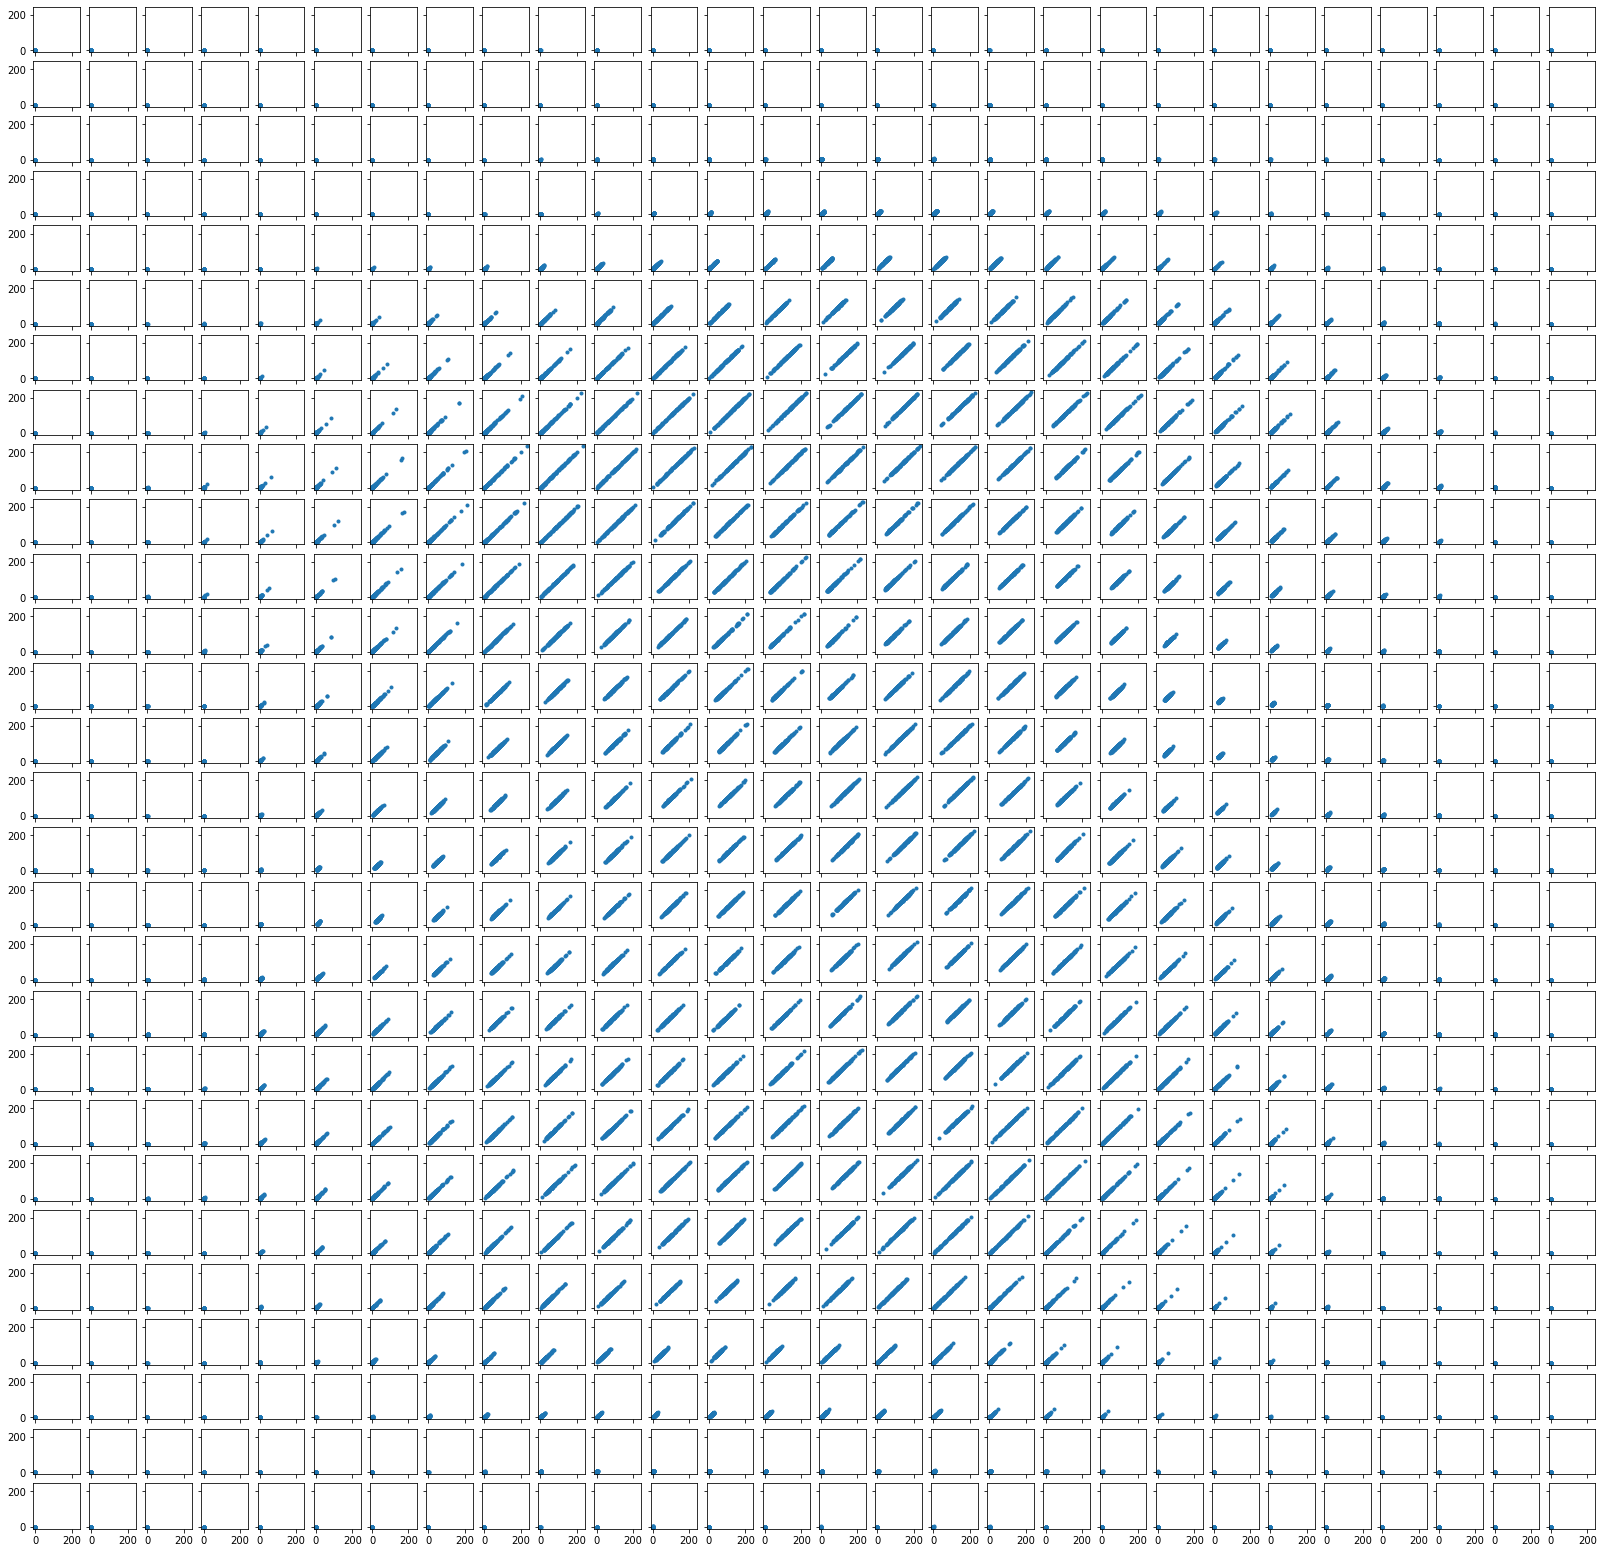

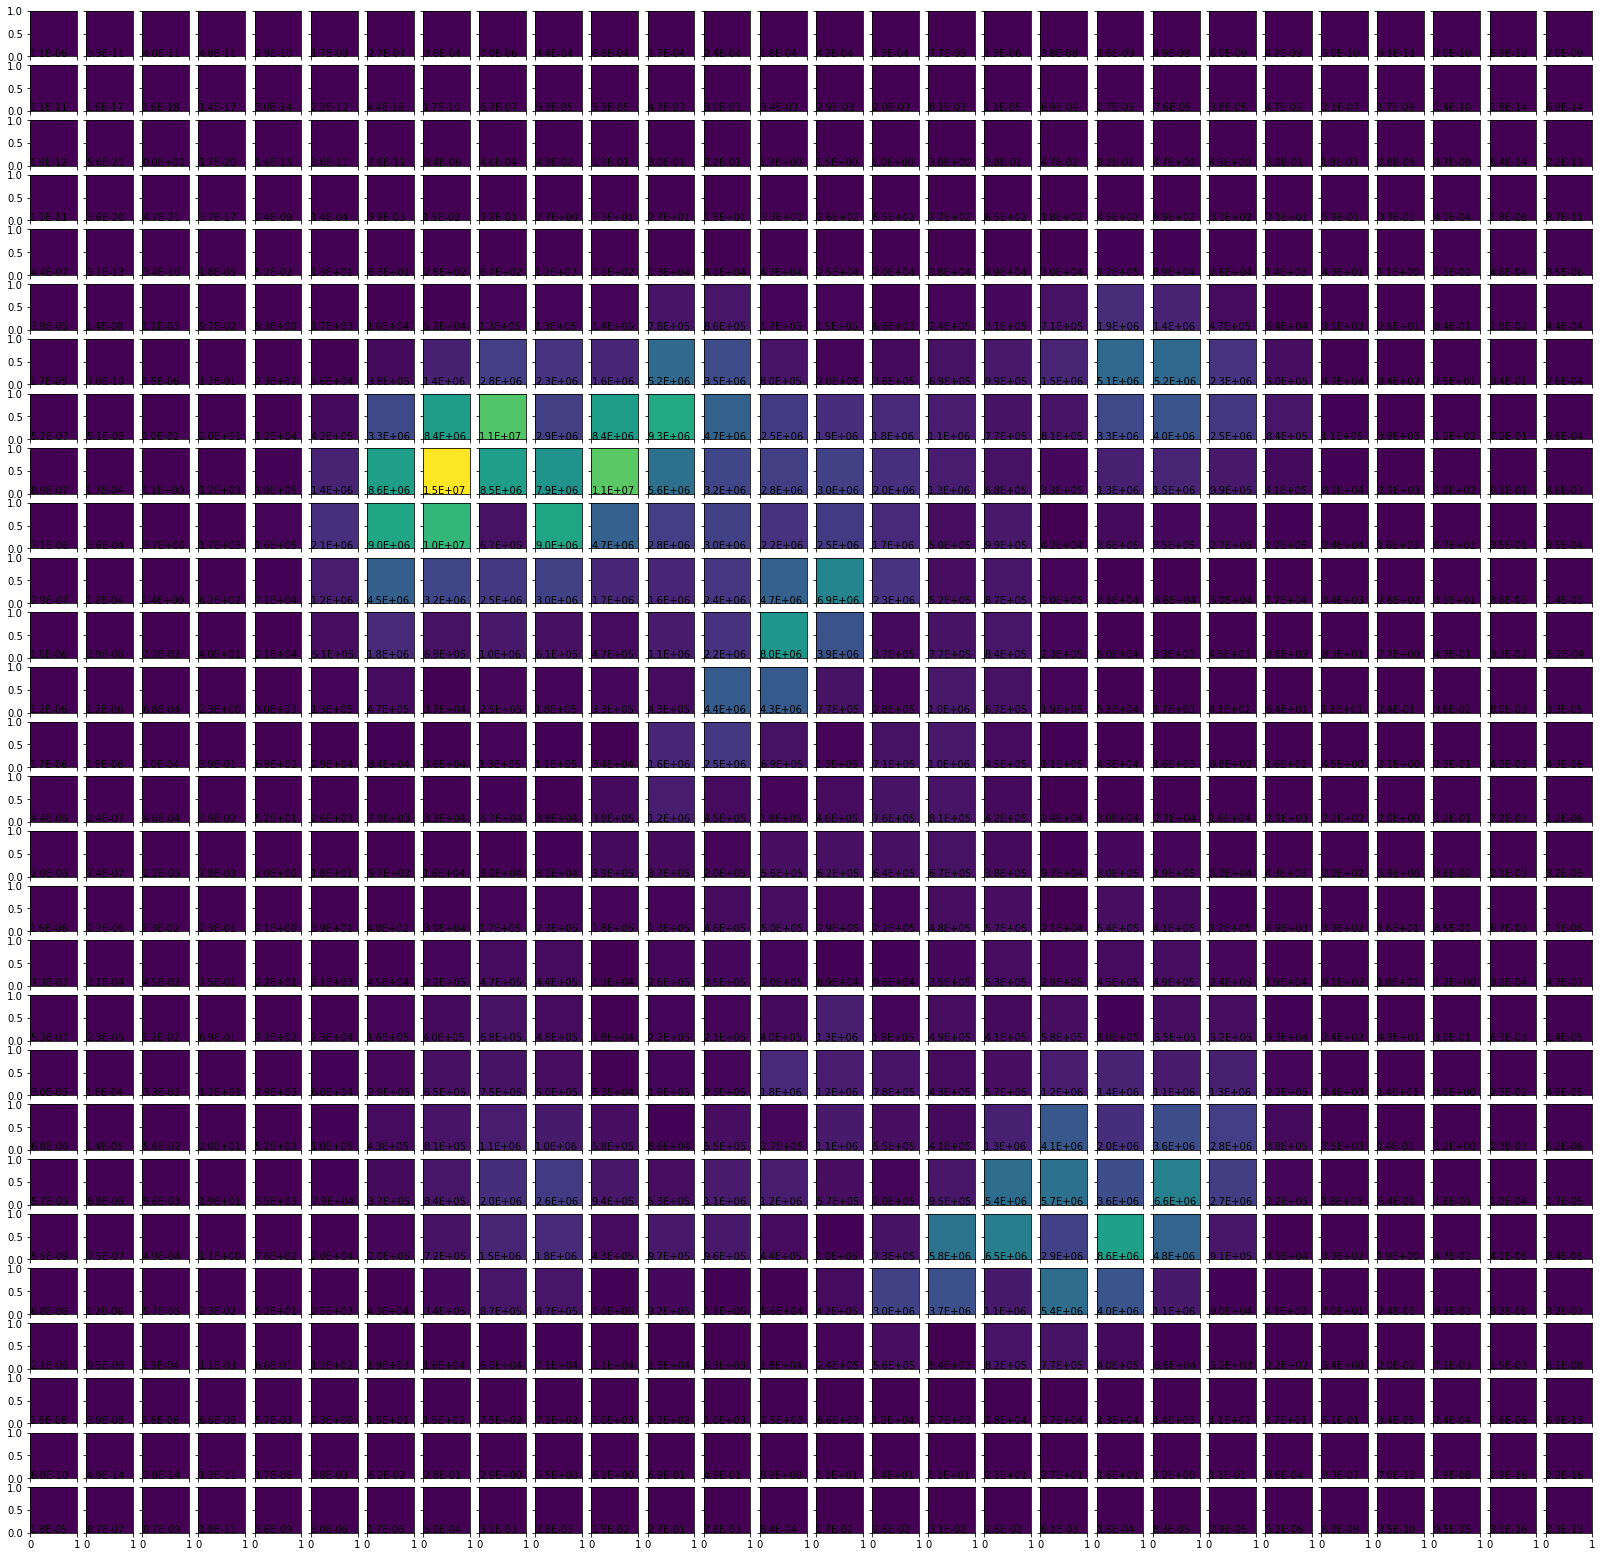

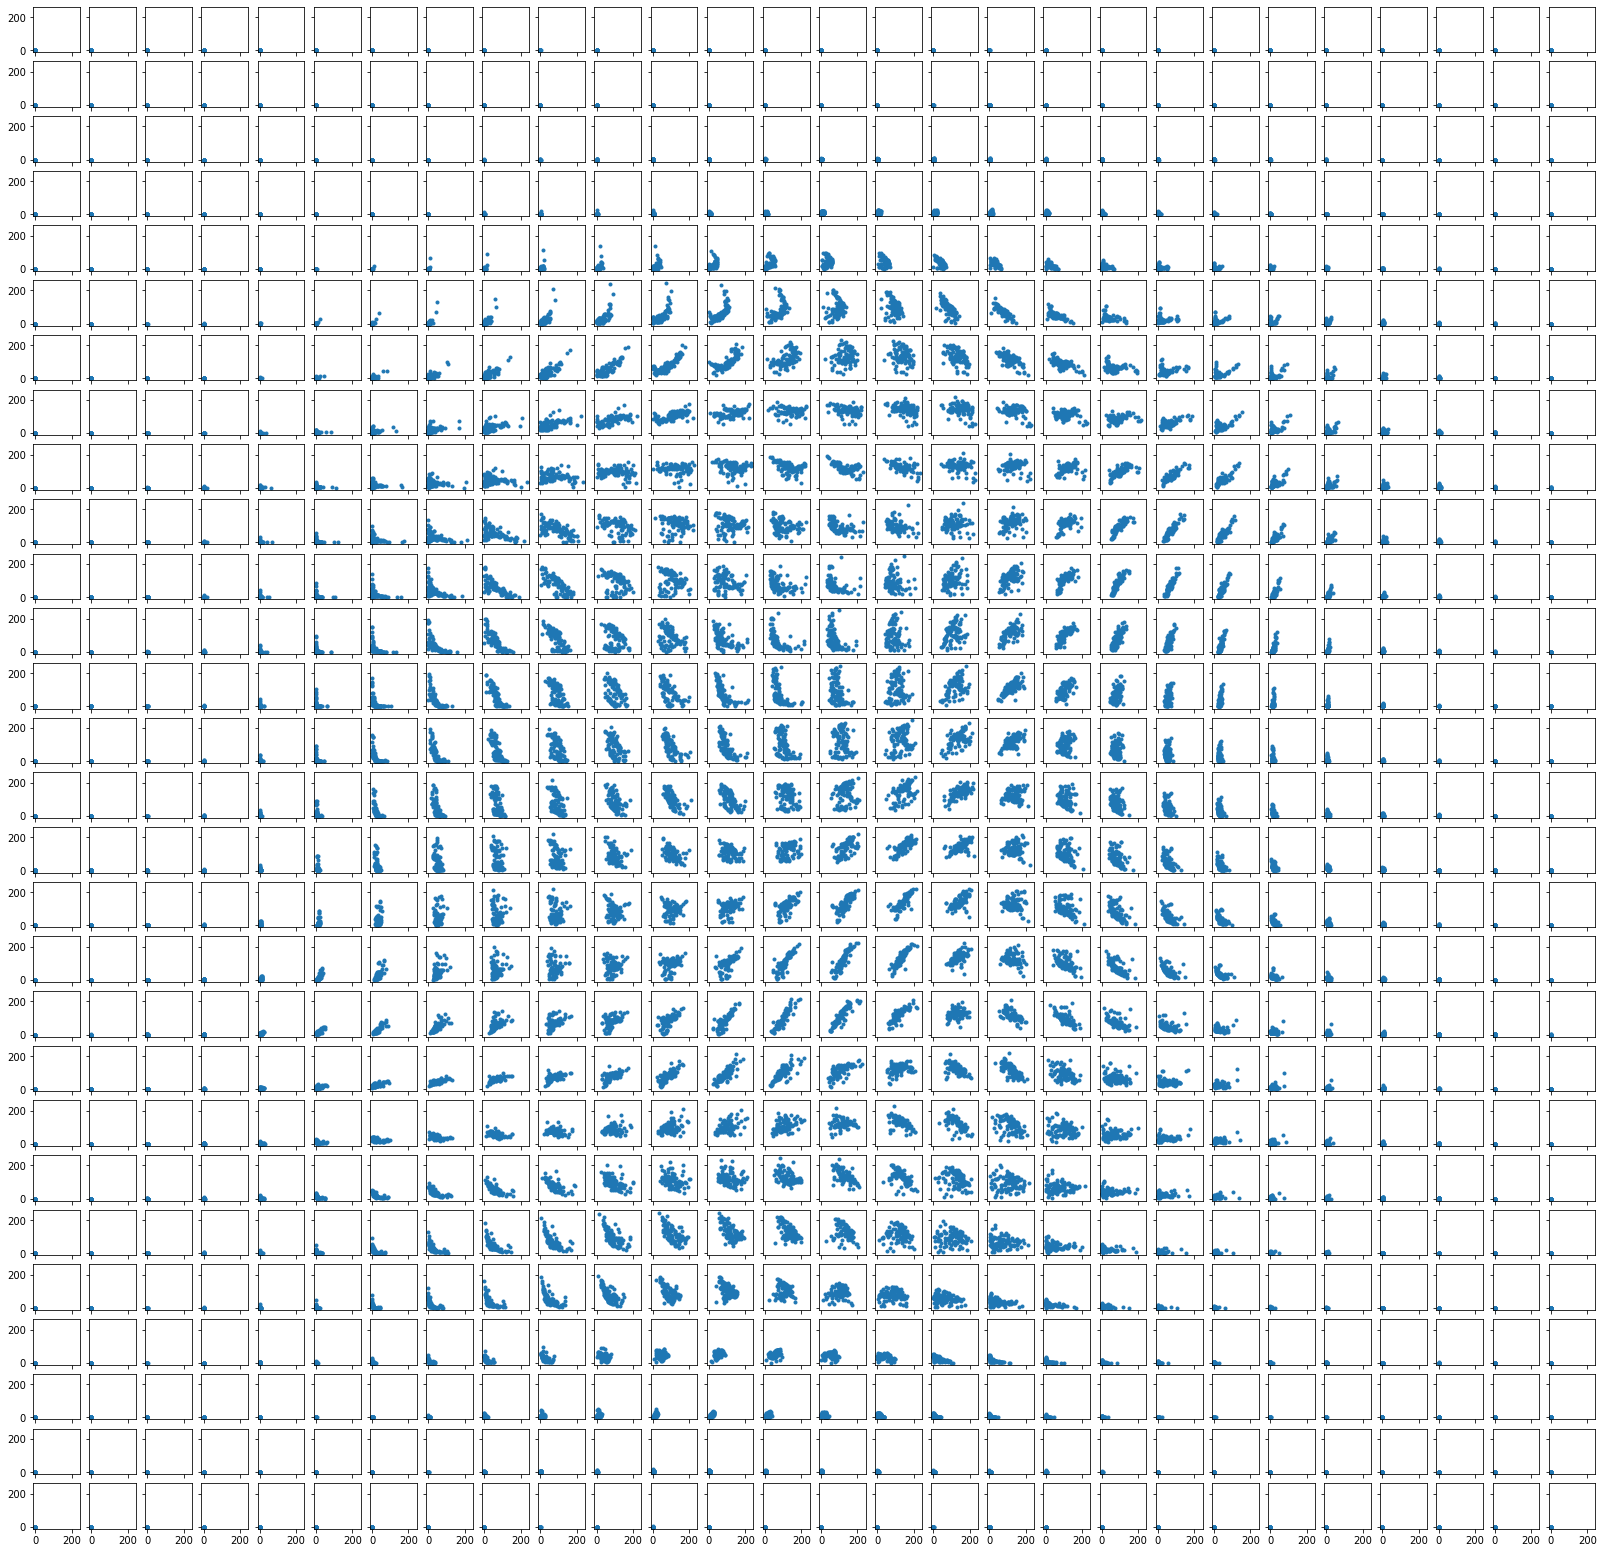

In [ ]:
from utils.statistic import cross_cumulants
import matplotlib
%matplotlib inline

num_as = 100
num_samples = 300
        
rows = 28
cols = 28

from matplotlib import cm
viridis = cm.get_cmap('viridis', 256)

for name, decoder in [('vlae', vlae.decoder), ('vlae_gan', vlae_gan_mnist_decoder)]:    
    a_s = np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=num_as)
    gens = np.array([avg_gen_for_a(np.expand_dims(a,0), 3 if 'vlae' in name else 1, num_samples, decoder) for a in tqdm(a_s)])
    
    print(name)
    for m,n in tqdm(np.array(np.meshgrid([0,1,2], [0,1,2])).T.reshape(-1,2)):
        fig1, ax1 = plt.subplots(nrows=rows,ncols=cols,sharex=True,sharey=True, figsize=(rows, cols))
        fig2, ax2 = plt.subplots(nrows=rows,ncols=cols,sharex=True,sharey=True, figsize=(rows, cols))
        k=0
        vmin = np.inf
        vmax = -np.inf
        ccs = {}
        print("m={},n={}".format(m,n))
        for i in range(28):
            ccs[i] = {}
            for j in range(28):
                g1 = np.copy(gens[:,m,i,j,0])
                g2 = np.copy(gens[:,n,i,j,0])
                cc = cross_cumulants(np.stack((g1, g2),axis=-1))
                ccs[i][j] = cc
                c_min, c_max = np.min(cc), np.max(cc)
                if c_min < vmin: vmin = c_min
                if c_max > vmax: vmax = c_max
                row = k//rows
                col = k%cols
                k+=1
                #print("k {} row {} col {}".format(k, row, col))
                ax1[row,col].plot(g1,g2,'.')
        fig1.xlabel = "Mean pixel itensity first component"
        fig2.xlabel = "Mean pixel itensity first component"
        fig1.savefig("ccs_{}_{}_{}.png".format(m,n,name))
        k = 0
        for i in range(28):
            for j in range(28):
                row = k//(rows)
                col = k%cols
                ax2[row,col].text(x=0,y=0,s="{:.1E}".format(ccs[i][j]))
                ax2[row,col].set_facecolor(viridis((ccs[i][j]-vmin)/vmax))
                k+=1
        fig1.ylabel = "Mean pixel intensity second component"
        fig2.ylabel = "Mean pixel intensity second component"
        fig2.savefig("ccs_hm_{}_{}_{}.png".format(m,n,name))